In [37]:
import numpy as np
import pandas as pd

In [ ]:
#logistic_regression---> target varibale(binary) 0 , 1
#actual      predicted
# 0            0
# 1            1
# 0            1
# 1            0

In [ ]:
prob of 1 ---> p
logistic regression formula --> ln(p/1-p)
(natural log -->log to the base e --> ln)prob of 0 ---> q
p + q = 1

In [ ]:
logistic regression formula --> ln(p/1-p)
(natural log -->log to the base e --> ln)

In [18]:
p = .5     
q = 1 - p
logit_value = np.log(p/q)
logit_value

#when prob is more than .5 then event 1 occurs and if the probability is less than .5 then event 0 will occur
# as p is moving towards 1 values are moving towards infinity
# as p is moving towards 0 values are moving towards minus infinity

0.0

In [ ]:
#sigmoid curve-->sigma function
    eg:- you are trying to find reltion between persons age and if person is diabetic or not???
prob 0 indicates there is no diabetis and wehn prob is increasing it means chance of diabetis are increasing

In [ ]:
# to build the predicive model which can predict your loan status
--> data gathering
    data cleaning 
    data gathering preprocessing


In [39]:
cr=pd.read_csv(r'C:\Users\User\OneDrive\Desktop\python\CreditRisk.csv')

In [45]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [53]:
import warnings 
warnings.filterwarnings('ignore')

In [55]:
cr.Gender.fillna('Male',inplace=True)
cr.Married.fillna('Yes',inplace=True)
cr.Dependents.fillna(0,inplace=True)
cr.Self_Employed.fillna('No',inplace=True)
cr.LoanAmount.fillna(cr.LoanAmount.mean(),inplace=True)
cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean(),inplace=True)
cr.Credit_History.fillna(0,inplace=True)

In [59]:
cr= cr.drop(['Loan_ID'],axis = 1)

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cr[cr.select_dtypes(include = 'object').columns]=cr[cr.select_dtypes(include = 'object').columns].apply (le.fit_transform)

In [530]:
    cr.select_dtypes(include = 'object').columns

Index([], dtype='object')

In [69]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [79]:
from sklearn.model_selection import train_test_split
cr_train , cr_test = train_test_split(cr, test_size = .2, random_state=18)
cr_train_x = cr_train.iloc[ :,0:-1]
cr_train_y = cr_train.iloc[:,-1]

cr_test_x = cr_test.iloc[ :,0:-1]
cr_test_y = cr_test.iloc[:,-1]

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(cr_train_x,cr_train_y)

LogisticRegression()

In [83]:
logreg.predict (cr_test_x)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [532]:
pred_test = logreg.predict (cr_test_x)

In [116]:
from sklearn.metrics import confusion_matrix , accuracy_score ,recall_score , precision_score, f1_score

In [96]:
tab1 = confusion_matrix(cr_test_y , pred_test)
tab1

array([[ 19,  31],
       [ 12, 135]], dtype=int64)

In [98]:
tab1.diagonal().sum()*100 / tab1.sum()

78.1725888324873

In [102]:
accuracy_score(cr_test_y , pred_test)*100

78.1725888324873

In [108]:
recall_score(cr_test_y , pred_test)*100

91.83673469387756

In [114]:
precision_score(cr_test_y , pred_test)*100

81.32530120481928

In [122]:
2*81.32530120481928 *91.83673469387756/(81.32530120481928 +91.83673469387756)


86.26198083067094

In [126]:
f1_score(cr_test_y , pred_test)*100

86.26198083067092

In [128]:
from sklearn.metrics import roc_auc_score, roc_curve

In [132]:
logreg.predict_proba(cr_test_x)
            #0          #1

array([[0.18548167, 0.81451833],
       [0.11035376, 0.88964624],
       [0.71746926, 0.28253074],
       [0.28973187, 0.71026813],
       [0.19418774, 0.80581226],
       [0.08608077, 0.91391923],
       [0.2946088 , 0.7053912 ],
       [0.14216314, 0.85783686],
       [0.18245833, 0.81754167],
       [0.22524769, 0.77475231],
       [0.17456832, 0.82543168],
       [0.10876677, 0.89123323],
       [0.15077327, 0.84922673],
       [0.21731205, 0.78268795],
       [0.24175301, 0.75824699],
       [0.14562687, 0.85437313],
       [0.72121739, 0.27878261],
       [0.8189916 , 0.1810084 ],
       [0.18696591, 0.81303409],
       [0.1731483 , 0.8268517 ],
       [0.29357397, 0.70642603],
       [0.17738166, 0.82261834],
       [0.1970856 , 0.8029144 ],
       [0.65016283, 0.34983717],
       [0.24062314, 0.75937686],
       [0.15665522, 0.84334478],
       [0.2215904 , 0.7784096 ],
       [0.08964838, 0.91035162],
       [0.16023715, 0.83976285],
       [0.19446093, 0.80553907],
       [0.

In [134]:
pred_prob = logreg.predict_proba(cr_test_x)

In [140]:
roc_auc_score(cr_test_y, pred_prob[:,1])

#this is area under roc_curve

0.7561904761904761

In [154]:
fpr,tpr ,c= roc_curve(cr_test_y, pred_prob[:,1])

In [156]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'AUROC on credit risk data :')

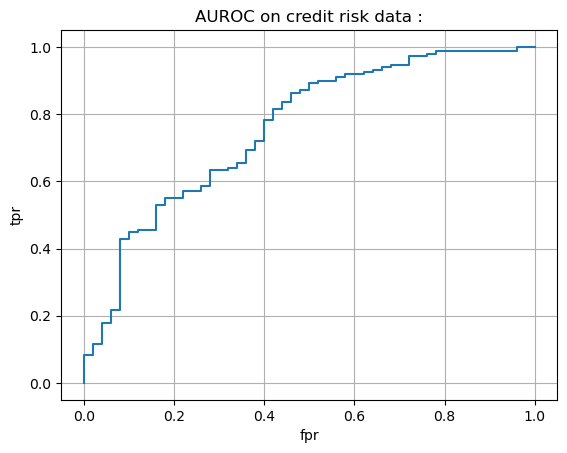

In [158]:
plt.plot(fpr,tpr)
plt.grid()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('AUROC on credit risk data :')
